## Project Description: Fake Job Postings Detection

### Objective:
    The objective of this project is to create a machine learning model for identifying fake job postings. The model utilizes features such as job titles, locations, company profiles, and other relevant information to classify job listings as either fraudulent or legitimate.

### Dataset:
    The dataset, stored in a CSV file named 'fake_job_postings.csv', includes columns such as job_id, title, location, department, salary_range, and others. The target variable, 'fraudulent,' indicates whether a job posting is fraudulent (1) or not fraudulent (0).

In [22]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Loading and Exploration: 
    I begin by loading the dataset, exploring its structure, and gaining insights into the distribution of fraudulent and non-fraudulent instances.

In [24]:
#Load dataset
file_path = 'C:\\Users\\Administrator\\Documents\\Data Science Projects\\fake_job_postings.csv'
df = pd.read_csv(file_path)

In [25]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


### Data Preprocessing: 
    Address missing values in the dataset and handle categorical features using techniques like one-hot encoding, preparing the data for model training.

In [26]:
nan_count = df.isnull().sum()

# Display the number of nan values
print("Number of NaN values in each column:")
print(nan_count)

Number of NaN values in each column:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [27]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [28]:
df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')
df['location'] = df['location'].fillna('')
df['employment_type'] = df['employment_type'].fillna('')
df['required_experience'] = df['required_experience'].fillna('')
df['required_education'] = df['required_education'].fillna('')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['text', 'location', 'employment_type', 'required_experience', 'required_education']],
    df['fraudulent'],
    test_size=0.2,
    random_state=0
)

### Model Development: 
    Choose a machine learning model, such as a Gradient Boosting Classifier, and train it using a pipeline that includes preprocessing steps and encoding of categorical features.

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', CountVectorizer(), 'text'),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), ['location', 'employment_type', 'required_experience', 'required_education'])
    ])

In [31]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())  
    ])

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', CountVectorizer(),
                                                  'text'),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location',
                                                   'employment_type',
                                                   'required_experience',
                                                   'required_education'])])),
                ('classifier', GradientBoostingClassifier())])

In [33]:
y_pred = pipeline.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [35]:
print('\nResults:')
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Results:
Accuracy: 0.9781879194630873

Confusion Matrix:
[[3421    2]
 [  76   77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3423
           1       0.97      0.50      0.66       153

    accuracy                           0.98      3576
   macro avg       0.98      0.75      0.83      3576
weighted avg       0.98      0.98      0.97      3576



### Visualization: 
Visualize confusion matrices and classification reports to gain insights into the model's behavior at different threshold levels.

In [36]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraudulent', 'Fraudulent'],
                yticklabels=['Not Fraudulent', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [37]:
def plot_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = report['accuracy']
    del report['accuracy']  # Remove accuracy from the dictionary to plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(report).T, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Classification Report\nAccuracy: {accuracy:.2f}')
    plt.show()

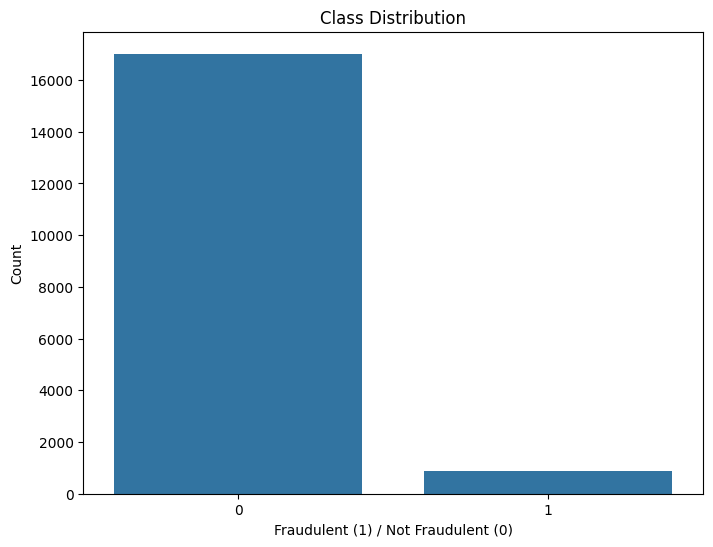

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Class Distribution')
plt.xlabel('Fraudulent (1) / Not Fraudulent (0)')
plt.ylabel('Count')
plt.show()

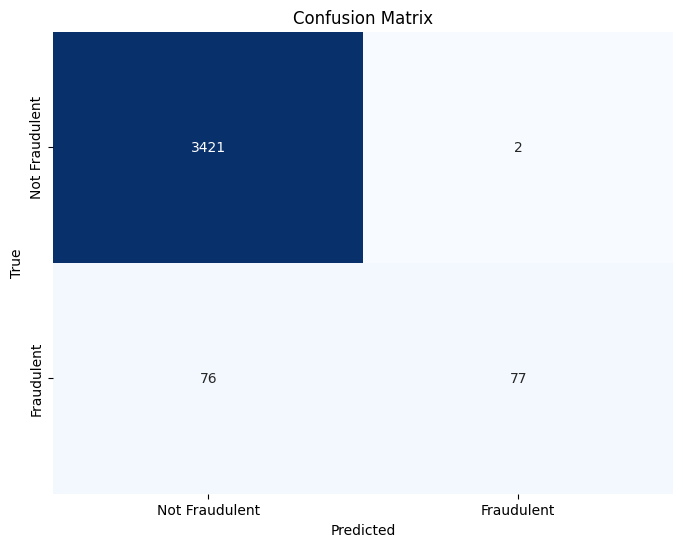

In [39]:
plot_confusion_matrix(y_test, y_pred)

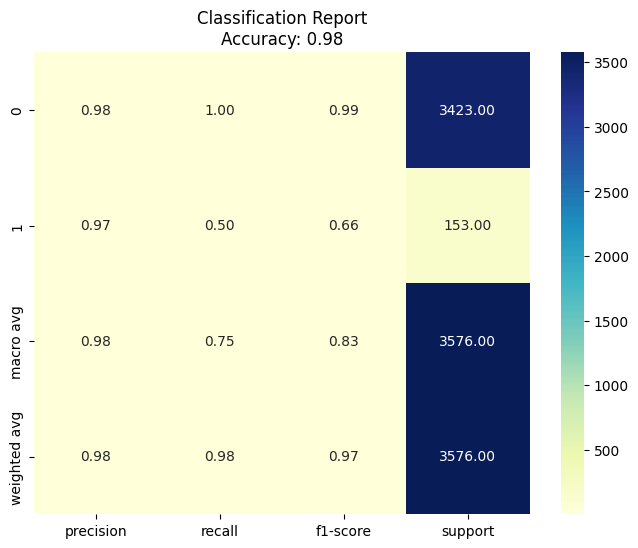

In [40]:
plot_classification_report(y_test, y_pred)

In [41]:
class_distribution = df['fraudulent'].value_counts()
imbalance_ratio = class_distribution[1] / class_distribution[0]
print(f'Imbalance Ratio: {imbalance_ratio:.4f}')

Imbalance Ratio: 0.0509


In [42]:
fraudulent_count = sum(y_pred == 1)
not_fraudulent_count = sum(y_pred == 0)

print(f"Number of instances predicted as fraudulent: {fraudulent_count}")
print(f"Number of instances predicted as not fraudulent: {not_fraudulent_count}")

Number of instances predicted as fraudulent: 79
Number of instances predicted as not fraudulent: 3497


In [43]:
fraudulent_count = df['fraudulent'].sum()
non_fraudulent_count = len(df) - fraudulent_count

# Display the counts
print("Number of Fraudulent instances:", fraudulent_count)
print("Number of Non-Fraudulent instances:", non_fraudulent_count)

Number of Fraudulent instances: 866
Number of Non-Fraudulent instances: 17014
